### Вариант 13
466513 \
13 % 36 = 13
| Вариант | Исходный формат  | Результ. формат | Дни недели |
| --- | --- | --- | --- |
| 13 | XML | JSON | Среда, суббота | 

https://itmo.ru/ru/schedule/3/125598/raspisanie_zanyatiy.htm

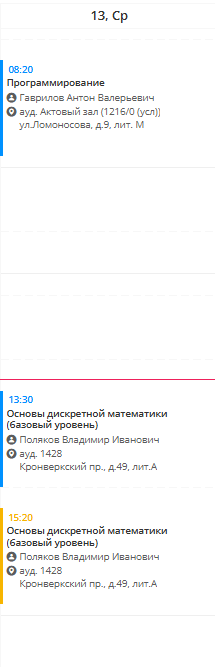
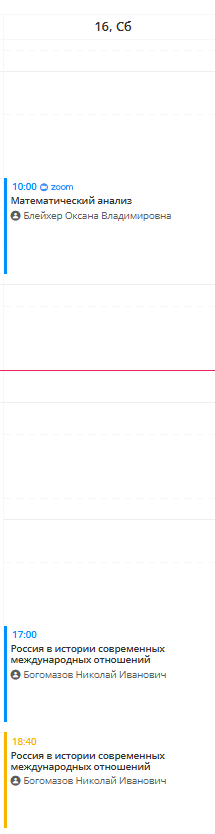

## Основное задание (45%)

написать код для парсинга XML в JSON без исопльзования библиотек и регулярных выражений

In [3]:
import time

xml_str = open("schedule.xml").read().replace("\n", "")


def checkSpaceLine(line):
    return any(i != " " for i in line)


def convertingXML2JSON(contain, tab_count=0):
    """
    Convert object contain from XML to JSON
    """
    obj = obje = ""
    descrip = ""
    flag_obj = False
    flag_founhead = False
    flag_depth = False
    i1 = 0
    i2 = len(contain)

    for i in range(len(contain)):
        l = contain[i]
        if l == "<":
            flag_obj = True
            continue
        if flag_obj:
            if l != ">":
                obj += l
            else:
                flag_obj = False
                i1 = i + 1
                break

    if obj == "":
        flag_depth = True

    while not flag_founhead and not flag_depth:
        obje = ""
        for i in range(i1, len(contain)):
            l = contain[i]
            if l == "<":
                flag_obj = True
                i2 = i
                continue
            if flag_obj:
                if l != ">":
                    obje += l
                else:
                    flag_obj = False
                    if obje[1:] == obj:
                        flag_founhead = True
                        break
                    else:
                        obje = ""

    descrip = contain[i1:i2]
    other = ""

    if not flag_depth:  # if object contains some more description
        conv, one_head = convertingXML2JSON(descrip, tab_count + 1)

        if not one_head:  # if object has more than 1 charachteristics
            obj_c = str(
                "\n"
                + tab_count * "    "
                + '"'
                + obj
                + '": {'
                + conv[:-1]
                + "\n"
                + tab_count * "    "
                + "}"
            )
        else:  # if object has 1 characteristic
            obj_c = str("\n" + tab_count * "    " + '"' + obj + '": ' + conv)

        other = contain[i2 + 2 + len(obje) :]

        # if text contain more than one object in one ierachiah level
        otherc, one_head = convertingXML2JSON(other, tab_count)
        obj_c += "," + otherc

    else:  # if entered text is a final description text of object
        if not checkSpaceLine(descrip):
            obj_c = ""
        else:
            obj_c = str('"' + descrip + '"')

    return obj_c, flag_depth


timer = time.time()
with open("schedule.json", "w") as f:
    f.write("{" + convertingXML2JSON(xml_str)[0][:-1] + "\n}")
    timer_ = time.time()
    print((timer_ - timer) * 100)

0.1567363739013672


## Дополнительное задание №1 (+10%)

a) Найти готовые библиотеки осуществлющие парсинг XML в JSON \
б) Переписать исходный код, применив найденные библиотеки (регулярны выражения исопльзовать нельзя) \
в) Сравнить полученные рузультаты и объяснить сходство/различие

In [8]:
import xmltojson
import time

timer = time.time()
with open("schedule.json", "w") as f:
    f.write(xmltojson.parse(open("schedule.xml").read()))
    timer_ = time.time()
    print((timer_ - timer) * 100)

0.19619464874267578


Библиотека **xmltojson** \
https://pypi.org/project/xmltojson/

| Вариант конвертации | Сходство | Различие |
|-|-|-|
| `base task code` | Верная конвертация как одиночных так и множественных характеристик обектов | 1) Код json записывается в несколько строк (удобно для чтения и восприятия). 2) Конвертация нескольких обхектов с одинаковым названием и одним уровнем в иерархии как несоклько обхектов одного типа с разными наборами хар-к. 3) Посимвольный анализ содержимого и замена терминалов/нетерминалов между форматами |
| `xmltojson` | Верная конвертация как одиночных так и множественных характеристик обектов | 1) Код json записывается в одну строку (невозможно читать и воспринимать такой код). 2) Конвертация нескольких одъектов с одинаковым названием и одним уровнем в иерархии как список несолкьких комплектов хар-к одного такого объекта. 3) Авторский алгоритм преобразования в библиотеке |

## Дополнительное задание №2 (+10%)
 а) Переписать исходный код, добавив в него использование
 регулярных выражений. \
 б) Сравнить полученные результаты и объяснить их
 сходство/различие.

In [2]:
import re
import time

xml_str = open("schedule.xml").read().replace("\n", "")


def checkSpaceLine(line):
    return any(i != " " for i in line)


def convertingXML2JSON(contain, tab_count=0):
    """
    Convert object contain from XML to JSON
    """
    obj = ""
    descrip = ""
    flag_depth = False
    i1 = 0
    i2 = len(contain)

    match = re.search(r"<(.+?)>", contain)

    if not match:
        flag_depth = True
    else:
        obj = match.group(1)
        i1, i2 = match.end(), re.search(f"</{match.group(1)}>", contain).start()

    descrip = contain[i1:i2]
    other = ""

    if not flag_depth:  # if object contains some more description
        conv, one_head = convertingXML2JSON(descrip, tab_count + 1)

        if not one_head:  # if object has more than 1 charachteristics
            obj_c = str(
                "\n"
                + tab_count * "    "
                + '"'
                + obj
                + '": {'
                + conv[:-1]
                + "\n"
                + tab_count * "    "
                + "}"
            )
        else:  # if object has 1 characteristic
            obj_c = str("\n" + tab_count * "    " + '"' + obj + '": ' + conv)

        other = contain[i2 + 3 + len(obj) :]

        # if text contain more than one object in one ierachiah level
        otherc, one_head = convertingXML2JSON(other, tab_count)
        obj_c += "," + otherc

    else:  # if entered text is a final description text of object
        if not checkSpaceLine(descrip):
            obj_c = ""
        else:
            obj_c = str('"' + descrip + '"')

    return obj_c, flag_depth


timer = time.time()
with open("schedule.json", "w") as f:
    f.write("{" + convertingXML2JSON(xml_str)[0][:-1] + "\n}")
    timer_ = time.time()
    print((timer_ - timer) * 100)

0.11866092681884766


| Вариант конвертации | Сходство | Различие |
|-|-|-|
| `base task code` | 1)Верная конвертация как одиночных так и множественных характеристик обектов. 2) Конвертация нескольких обхектов с одинаковым названием и одним уровнем в иерархии как несоклько обхектов одного типа с разными наборами хар-к. 3) Код json записывается в несколько строк (удобно для чтения и восприятия). 4) Конвертация между ворматами путем символьной замены терминалов и нетерминалов | посимвольный перебор содержимого |
| `Code with regex` | рузультат и принцип работы польностью соответствует варианту `base task code` | поиск по содержимому производится через regex python |

## Дополнительное задание №3 (+25%)

а) Переписать исходный код таким образом, чтобы для решения задачи использовались формальные грамматики. То есть ваш код должен уметь осуществлять парсинг и конвертацию любых данных, представленных в исходном формате, в данные, представленные в результирующем формате: как с готовыми библиотеками из дополнительного задания №1. \
b) Проверку осуществить как минимум для расписания сдвумя учебными днями по два занятия в каждом.\
в) Сравнить полученные результаты и объяснить их сходство/различие.

In [1]:
import re
import json
import time

xml_str = open("schedule.xml").read().replace("\n", "")


def convertingXML2JSON(xml):
    """
    Convert object contain from XML to JSON
    """
    pattern = r"<([^/>]+)>(.*?)</\1>"
    obj = {}

    matches = re.findall(pattern, xml)

    for header, content in matches:
        inner_matches = re.findall(
            pattern, content
        )  # Проверяем, есть ли  обхекты и хар-ки
        if inner_matches:
            inner_cont = convertingXML2JSON(
                content
            )  # Если есть вложенные обхекты, рекурсивно обрабатываем
        else:
            inner_cont = content.strip()

        # Если обхект уже существует в нашей памяти, добавляем к нему
        if header in obj:
            if isinstance(obj[header], list):
                obj[header].append(inner_cont)
            else:
                obj[header] = [obj[header], inner_cont]
        else:
            obj[header] = inner_cont  # Сохраняем первый объект

    return obj


timer = time.time()
with open("schedule.json", "w") as file:
    json.dump(convertingXML2JSON(xml_str), file, indent=4)
    timer_ = time.time()
    print((timer_ - timer) * 100)

0.25060176849365234


| Вариант конвертации | Сходство | Различие |
|-|-|-|
| `base task code` | 1)Верная конвертация как одиночных так и множественных характеристик обектов. 2) Конвертация нескольких обхектов с одинаковым названием и одним уровнем в иерархии как несоклько обхектов одного типа с разными наборами хар-к. 3) Код json записывается в несколько строк (удобно для чтения и восприятия). | 1) Посимвольный перебор содержимого файла. 2) Конвертация между форматами путем символьной замены терминалов и нетерминалов |
| `Code with formal grammar (python dicts)` | 1) рузультат работы польностью соответствует варианту `base task code`. 2) Использование регулярных выражений | 1) Использование регулярных выраженй для извлечения содержимого обхектов. 2) Конвертация между форматими путем псоставления словаря python, полностью соответствующего иерахии и содержимому исходного файла |

## Дополнительное задание №4 (+5%)

а) Используя свою исходную программу из обязательного задания и программы из дополнительных заданий, сравнить стократное время выполнения парсинга + конвертации в цикле. \
б) Проанализировать полученные результаты и объяснить их сходство/различие.

### Время выполнения
| Code | Time (ms) |
|-|-|
| Firs base task code | 0.20380020141601562 |
| Dop task Code with libs | 0.4066944122314453 |
| Dop task code with regex | 0.4821300506591797 |
| Dop task code with regex and formal grammar (dicts) | 0.6499767303466797 |
| Dop task code to transform XML to AVRO | 0.20780563354492188 |

1) Самым быстрым варинатом казался код базового задания с посимвольным перебором файла. Ввидду его простых алгоритмов код работает быстро.
2) Код с использованием стронней библиотеки для конвертации между XML и JSON сработал вдвое дольше чем первый базовым вариант кода.
3) Вариант кода с регулярными выражениями оказался почти в 2.5 раза медленнее исходного первого кода и дольше кода, используещего стронние библиотеки. Это свяязано с двухкрытным использованием поиска по регулярным выражениям на каждой итерации рекурсии.
4) Вариант кода с регулярными выражениями и формальными грамматиками оказался самым медленным по времени выполнения, почти в 3.25 раза медленнее первого базового кода. Это связано со сложностью алгоритмов работы регулярных выражений и операциями со списками и словарями. Однако, такой код получился в двое меньше кода базавого задания и проще для понимания.
5) Вариант кода преобразования XML в AVRO через парсинг JSON сработал почти за то же время что и код базового задания. Это связано с тем, что за его основу польностью взял код базового задания и лишь добавлена построчная запись в файл AVRO с преобразованием информации в бинарную форму.

## Дополнительное задание №5 (+5%)

а) Переписать исходную программу, чтобы она осуществляла парсинг и конвертацию исходного файла в любой другой формат (кроме JSON, YAML, XML, HTML): PROTOBUF, TSV, CSV, WML и т.п. \
б) Проанализировать полученные результаты, объяснить особенности использования формата.

In [ ]:
import time

xml_str = open("schedule.xml").read().replace("\n", "")


def chechSpaceLine(line):
    return any(i != " " for i in line)


def convertingXML2JSON(contain, tab_count=0):
    obj = obje = ""
    descrip = ""
    flag_obj = False
    flag_founhead = False
    flag_depth = False
    i1 = 0
    i2 = len(contain)

    for i in range(len(contain)):
        l = contain[i]
        if l == "<":
            flag_obj = True
            continue
        if flag_obj:
            if l != ">":
                obj += l
            else:
                flag_obj = False
                i1 = i + 1
                break

    if obj == "":
        flag_depth = True

    while not flag_founhead and not flag_depth:
        obje = ""
        for i in range(i1, len(contain)):
            l = contain[i]
            if l == "<":
                flag_obj = True
                i2 = i
                continue
            if flag_obj:
                if l != ">":
                    obje += l
                else:
                    flag_obj = False
                    if obje[1:] == obj:
                        flag_founhead = True
                        break
                    else:
                        obje = ""

    descrip = contain[i1:i2]
    other = ""

    if not flag_depth:  # if object contains some more description
        conv, one_head = convertingXML2JSON(descrip, tab_count + 1)

        if not one_head:  # if object has more than 1 characteristic
            obj_c = str(
                "\n"
                + tab_count * "    "
                + '"'
                + obj
                + '": {'
                + conv[:-1]
                + "\n"
                + tab_count * "    "
                + "}"
            )
        else:  # if object has 1 characteristic
            obj_c = str("\n" + tab_count * "    " + '"' + obj + '": ' + conv)

        other = contain[i2 + 2 + len(obje) :]

        # if text contain more than one object in one hierarchy level
        otherc, one_head = convertingXML2JSON(other, tab_count)
        obj_c += "," + otherc

    else:  # if entered text is a final description text of object
        if not chechSpaceLine(descrip):
            obj_c = ""
        else:
            obj_c = str('"' + descrip + '"')

    return obj_c, flag_depth


def write_avro(data, filename):
    with open(filename, "wb") as f:
        f.write(b"Obj")  # AVRO magic header bytes
        schema = b'{"type": "record", "name": "root", "fields": [{"name": "description", "type": "string"}]}'
        schema_length = len(schema).to_bytes()
        f.write(schema_length)
        f.write(schema)

        # Write data with newlines for readability
        for item in data:
            desc = item.get("description", "")
            desc_bytes = desc.encode("utf-8")
            desc_length = len(desc_bytes).to_bytes()
            f.write(desc_length)
            f.write(desc_bytes)
            f.write(b"\n")  # Add newline for readability


timer = time.time()

json_data = convertingXML2JSON(xml_str)[0][:-1]
# Convert JSON data to a list for AVRO
avro_data = []
for line in json_data.splitlines():
    if line.strip():  # Ignore empty lines
        avro_data.append({"description": line.strip()})

write_avro(avro_data, "schedule.avro")

timer_ = time.time()
print((timer_ - timer) * 100)

0.20780563354492188


Формат `Apache AVRO` используется в нагруженных и высокопроизводительных системах, т.к. прочесть такие файлы можно с очень высокой скоростью. Скорость обеспечивается тем, что информация записана в бинарном виде. При этом, несмотря на то, что информация, записаная `Apache AVRO` находится в бинарном виде, который невозможно читать и воспринимать человеком, чтобы писать в этот формат исопльзуется всем известный, языконезависимый и наглядно понятный человеку формат JSON.